<a href="https://colab.research.google.com/github/22001391Jestrada/ProyectoFinalIA/blob/main/Proyecto_SP_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0) Data preparation

In [ ]:
# Exportamos las librerias correspondientes
import matplotlib.pyplot as plt

# Para la manipulacion de los datos
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# para la visualizacion de mas graficas complejas
import seaborn as sns

# Para la red neuronal
import tensorflow as tf

# Miscellaneous Libraries
import os

# Constante global para el entrenamiento accelerado
AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx


--2025-05-30 10:10:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘ENB2012_data.xlsx.1’

ENB2012_data.xlsx.1     [  <=>               ]  74.40K   217KB/s    in 0.3s    

2025-05-30 10:10:39 (217 KB/s) - ‘ENB2012_data.xlsx.1’ saved [76189]



In [ ]:
# Cargamos el dataset
raw_dataset = pd.read_excel("ENB2012_data.xlsx")

# Describir los valores
raw_dataset.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
raw_dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
raw_dataset.dtypes

,0
X1,float64
X2,float64
X3,float64
X4,float64
X5,float64
X6,int64
X7,float64
X8,int64
Y1,float64
Y2,float64


In [ ]:
raw_dataset.shape

(768, 10)

In [ ]:
# Hacemos una copia de la data original
new_dataset_AI = raw_dataset.copy()

# Miramos los valores nulos y despues los borramos
print(new_dataset_AI.isna().sum())

new_dataset = new_dataset_AI.dropna()

# verificamos la nueva data
new_dataset.head()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


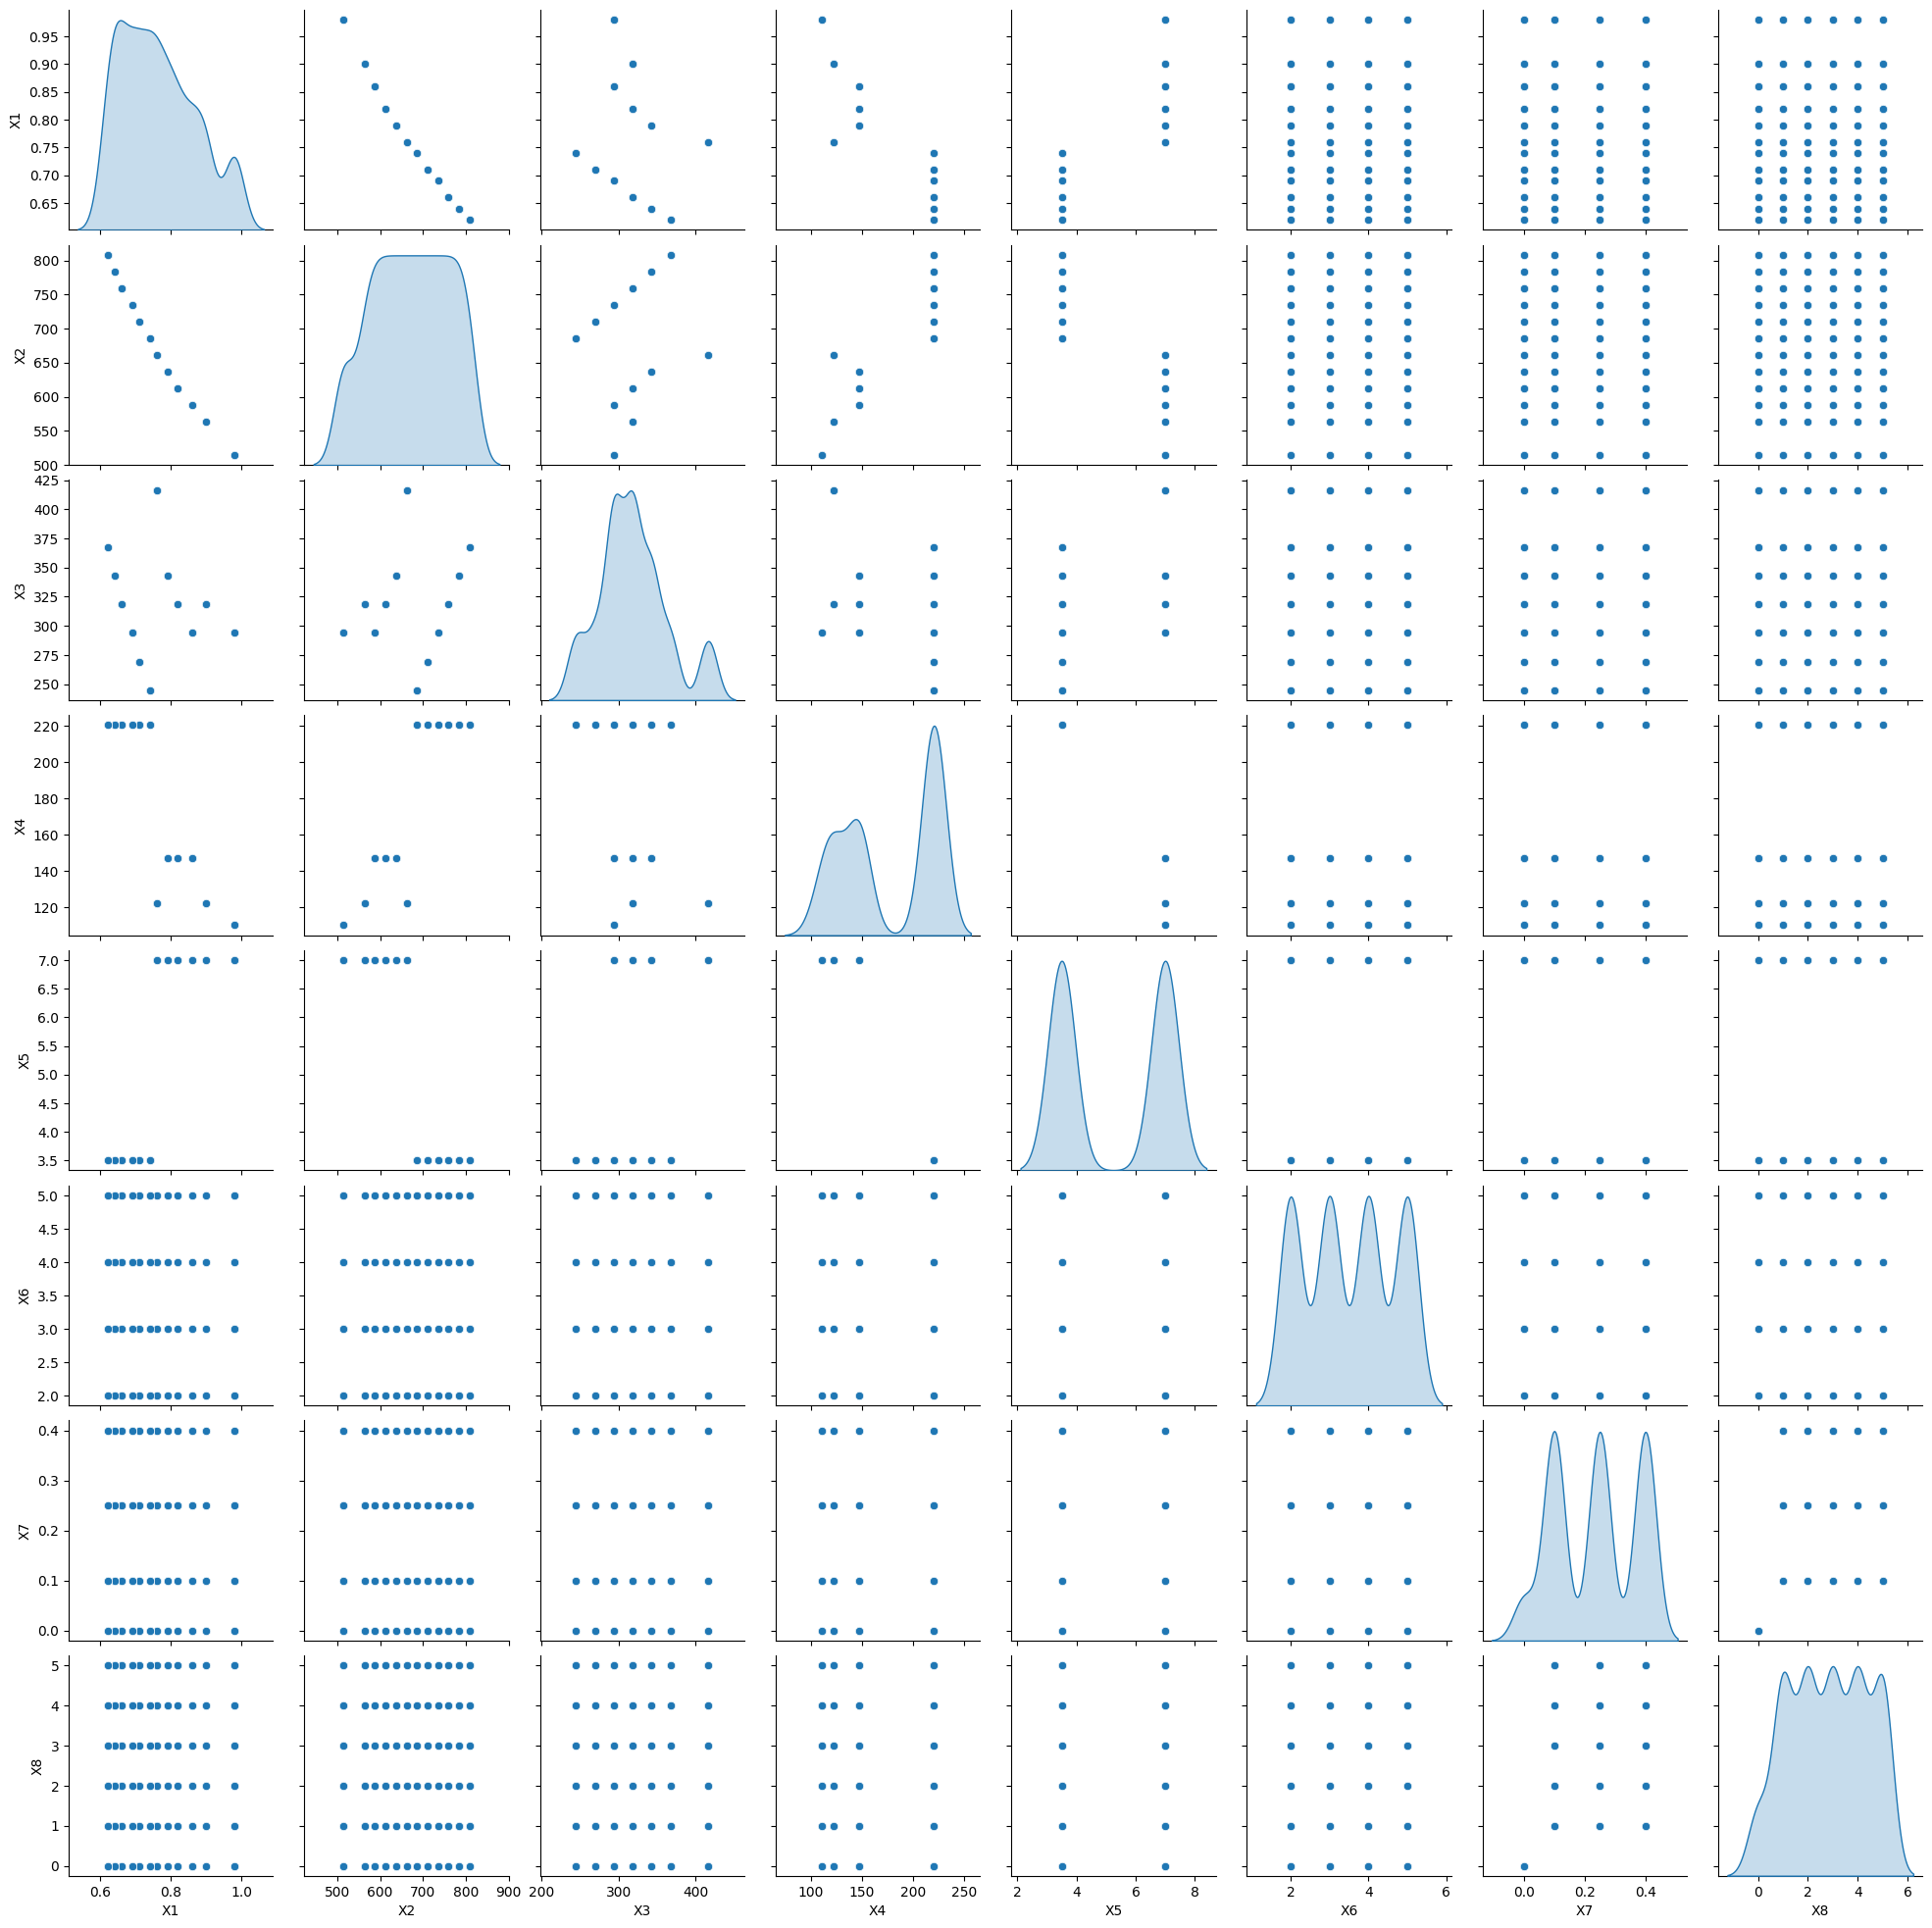

In [ ]:
# Visualizamos la data por medio de graficas pero solo variables numericas
sns.pairplot(new_dataset[['X1','X2','X3',
                          'X4','X5','X6','X7','X8']], diag_kind="kde")

In [ ]:
# separamos las entradas y salidas

X = new_dataset[['X1','X2','X3','X4','X5','X6','X7','X8']]

y = new_dataset[['Y1','Y2']]

In [ ]:
# prompt: normaliza los datos pero antes revisa si hay datos categoricos

# Check for categorical data
categorical_cols = new_dataset.select_dtypes(include='object').columns
print("Categorical columns:", list(categorical_cols))

# If there are categorical columns, decide how to handle them (e.g., one-hot encoding)
# For this specific dataset (ENB2012), there are no categorical features based on the file description,
# so we can proceed with numerical normalization directly.
# If you had categorical data, you would typically use pd.get_dummies() here.

# Normalizar los datos numéricos (usando las variables de entrada X)
# Podemos usar MinMaxScaler o StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Usar MinMaxScaler para escalar los datos entre 0 y 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Opcional: Convertir de nuevo a DataFrame para mantener los nombres de las columnas si es necesario
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Normalizar las salidas (y) también es común en problemas de regresión si sus rangos son muy diferentes
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

# Opcional: Convertir de nuevo a DataFrame
y_scaled_df = pd.DataFrame(y_scaled, columns=y.columns)

print("\nData after scaling X (first 5 rows):")
print(X_scaled_df.head())

print("\nData after scaling y (first 5 rows):")
print(y_scaled_df.head())

# Ahora puedes usar X_scaled (o X_scaled_df) y y_scaled (o y_scaled_df) para tu entrenamiento.


Datos de entrada normalizados:
         X1        X2        X3        X4   X5        X6   X7   X8
0  1.000000  0.000000  0.285714  0.000000  1.0  0.000000  0.0  0.0
1  1.000000  0.000000  0.285714  0.000000  1.0  0.333333  0.0  0.0
2  1.000000  0.000000  0.285714  0.000000  1.0  0.666667  0.0  0.0
3  1.000000  0.000000  0.285714  0.000000  1.0  1.000000  0.0  0.0
4  0.777778  0.166667  0.428571  0.111111  1.0  0.000000  0.0  0.0

Datos de salida normalizados:
         Y1        Y2
0  0.257212  0.280905
1  0.257212  0.280905
2  0.257212  0.280905
3  0.257212  0.280905
4  0.399838  0.468085


In [ ]:
#Separamos los valores para el entramiento y prueba
train, test = train_test_split(new_dataset, test_size=0.2)

#Separamos por medio de varibles dependientes e independientes
independent_variables = ['X1','X2','X3','X4','X5','X6','X7','X8']
dependent_variables = ['Y1','Y2']

X_train = train[independent_variables]
y_train = train[dependent_variables]

X_test = test[independent_variables]
y_test = test[dependent_variables]

In [ ]:
X_train

,X1,X2,X3,X4,X5,X6,X7,X8
27,0.74,686.0,245.0,220.5,3.5,5,0.00,0
119,0.76,661.5,416.5,122.5,7.0,5,0.10,2
610,0.69,735.0,294.0,220.5,3.5,4,0.40,2
90,0.64,784.0,343.0,220.5,3.5,4,0.10,1
314,0.74,686.0,245.0,220.5,3.5,4,0.25,1
...,...,...,...,...,...,...,...,...
696,0.74,686.0,245.0,220.5,3.5,2,0.40,4
422,0.66,759.5,318.5,220.5,3.5,4,0.25,3
85,0.66,759.5,318.5,220.5,3.5,3,0.10,1
762,0.64,784.0,343.0,220.5,3.5,4,0.40,5


In [ ]:
y_train

,Y1,Y2
27,6.04,11.17
119,32.41,33.78
610,14.33,17.23
90,15.42,19.34
314,12.41,15.28
...,...,...
696,14.37,16.61
422,12.74,16.14
85,11.69,13.72
762,18.16,20.71


In [ ]:
#Creamos el modelo de red neuronal para multiples regresiones
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(len(independent_variables),)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=len(dependent_variables), activation='relu'),
])

#Compilamos el modelo
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

#Entrenamos el modelo
complete_model = model.fit(X_train,
                           y_train,
                           epochs=30,
                           batch_size=32,
                           validation_split=0.2,
                           )

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 658.3680 - root_mean_squared_error: 25.6523 - val_loss: 679.4622 - val_root_mean_squared_error: 26.0665
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 589.1104 - root_mean_squared_error: 24.2675 - val_loss: 679.4622 - val_root_mean_squared_error: 26.0665
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 597.0673 - root_mean_squared_error: 24.4307 - val_loss: 679.4622 - val_root_mean_squared_error: 26.0665
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 593.4865 - root_mean_squared_error: 24.3523 - val_loss: 679.4622 - val_root_mean_squared_error: 26.0665
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 624.3922 - root_mean_squared_error: 24.9855 - val_loss: 679.4622 - val_root_mean_squared_error: 26.0665
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 561.4904 - root_mean_squared_error: 23.6890 - val_loss: 517.0886 - val_root_mean_squared_error: 22.7396
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
#evaluamos el modelo
model.evaluate(x=X_test, y=y_test, batch_size=128)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 37.7381 - root_mean_squared_error: 6.1431


[37.75583267211914, 6.144577503204346]

In [ ]:
# prompt: has el calculo del coeficiente de determinacion

from sklearn.metrics import r2_score

# Assuming you have made predictions from your trained model on the test set
# Replace 'y_pred' with your actual predictions
y_pred = model.predict(X_test)

# Calculate the R-squared score for each output variable
r2_y1 = r2_score(y_test['Y1'], y_pred[:, 0])
r2_y2 = r2_score(y_test['Y2'], y_pred[:, 1])

print(f"R-squared for Y1: {r2_y1}")
print(f"R-squared for Y2: {r2_y2}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R-squared for Y1: 0.6173315338360619
R-squared for Y2: 0.5670295447013511


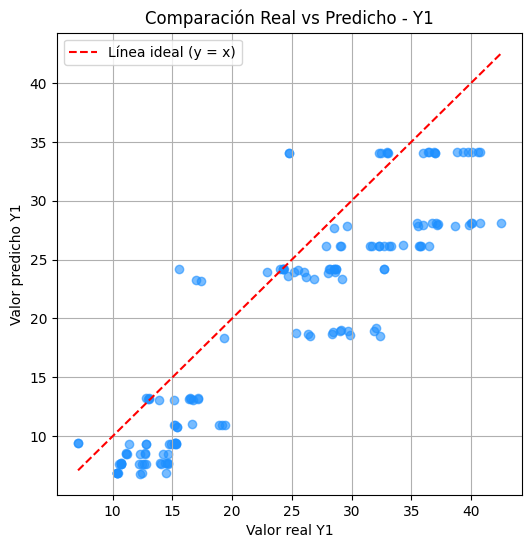

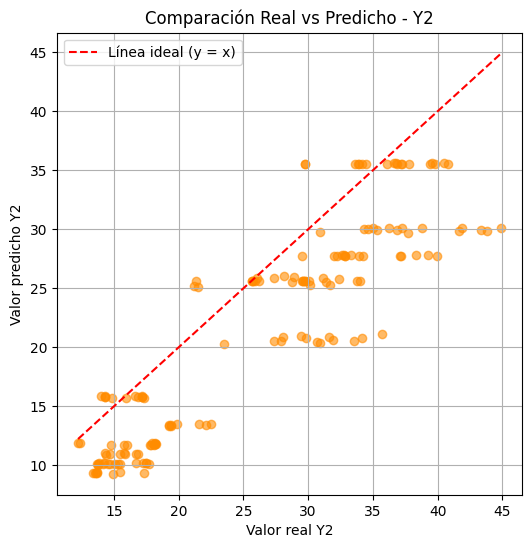

In [ ]:
# prompt: realiza la grafica entre y_test y y_pred

import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que ya tienes tus valores reales y predichos
# y_test: valores reales
# y_pred: valores predichos por el modelo

# Convertimos a arrays para fácil acceso por columnas
y_test_array = np.array(y_test)
y_pred_array = np.array(y_pred)

# Para Y1
plt.figure(figsize=(6,6))
plt.scatter(y_test_array[:, 0], y_pred_array[:, 0], color='dodgerblue', alpha=0.6)
plt.plot([y_test_array[:, 0].min(), y_test_array[:, 0].max()],
         [y_test_array[:, 0].min(), y_test_array[:, 0].max()],
         'r--', label='Línea ideal (y = x)')
plt.xlabel("Valor real Y1")
plt.ylabel("Valor predicho Y1")
plt.title("Comparación Real vs Predicho - Y1")
plt.legend()
plt.grid(True)
plt.show()

# Para Y2
plt.figure(figsize=(6,6))
plt.scatter(y_test_array[:, 1], y_pred_array[:, 1], color='darkorange', alpha=0.6)
plt.plot([y_test_array[:, 1].min(), y_test_array[:, 1].max()],
         [y_test_array[:, 1].min(), y_test_array[:, 1].max()],
         'r--', label='Línea ideal (y = x)')
plt.xlabel("Valor real Y2")
plt.ylabel("Valor predicho Y2")
plt.title("Comparación Real vs Predicho - Y2")
plt.legend()
plt.grid(True)
plt.show()